# Sales Analysis
### Importing Necessary Libraries

In [407]:
import pandas as pd
import os

In [408]:
import warnings
warnings.filterwarnings('ignore')


### Task 1: Merging 12 months of sales data into a single csv file

In [409]:
files=[file for file in os.listdir('E:\Excel Practice\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data')]
all_months_data=pd.DataFrame()
for file in files:
    df=pd.read_csv('E:\\Excel Practice\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\'+file)
    all_months_data=pd.concat([all_months_data,df])
all_months_data.to_csv('E:\\Excel Practice\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\all_data.csv',index=False)

### Read in updated dataframe

In [410]:
all_data=pd.read_csv('E:\\Excel Practice\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Data cleaning

In [411]:
all_data['Order Date'].isna().sum()

545

In [412]:
all_data_new=all_data.dropna(thresh=3)

In [413]:
all_data_new.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [414]:
all_data_new['Order Date'].isna().sum()

0

In [415]:
all_data_new[all_data_new['Order ID']=='Order ID']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


### Dropping unwanted rows

In [416]:
all_data_new.drop(all_data_new[all_data_new['Order ID']=='Order ID'].index,inplace=True)

In [417]:
all_data_new[all_data_new['Order ID']=='Order ID']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


### Augment data with additional columns

In [418]:
all_data_new.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [419]:

all_data_new['Order Date']=pd.to_datetime(all_data_new['Order Date'])
all_data_new['Month']=all_data_new['Order Date'].dt.month_name().str[:3]
all_data_new.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Apr


### Convert columns to correct data type

In [420]:
all_data_new['Quantity Ordered']=pd.to_numeric(all_data_new['Quantity Ordered'])
all_data_new['Price Each']=pd.to_numeric(all_data_new['Price Each'])

### Adding Sales column

In [421]:
all_data_new['Sales']=all_data_new['Quantity Ordered'] * all_data_new['Price Each']
all_data_new.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Apr,11.99


### Question 1: What was the best month for sales and how much was earned that month?

In [422]:
results=all_data_new.groupby('Month').sum()

In [423]:
results

,Quantity Ordered,Price Each,Sales
Month,,,
Apr,20558,3367671.02,3390670.24
Aug,13448,2230345.42,2244467.88
Dec,28114,4588415.41,4613443.34
Feb,13449,2188884.72,2202022.42
Jan,10903,1811768.38,1822256.73
Jul,16072,2632539.56,2647775.76
Jun,15253,2562025.61,2577802.26
Mar,17005,2791207.83,2807100.38
May,18667,3135125.13,3152606.75


In [424]:
import calendar
month=list(calendar.month_name)
month=month[1:]
months=[]
for x in month:
    months.append(x[0:3])

#months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
results=results.reindex(months,axis=0)



In [425]:
#results
months

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

In [426]:
import matplotlib.pyplot as plt

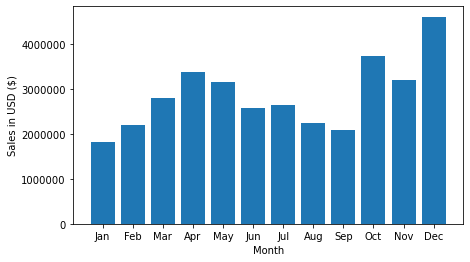

In [427]:
fig,ax=plt.subplots()
#plt.bar(results.index,results['Sales'])
plt.bar(months,results['Sales'])

plt.xlabel('Month')
plt.ylabel('Sales in USD ($)')
ax.ticklabel_format(axis='y',style='plain')
#plt.xticks(results.index)
fig.set_figwidth(7)
plt.xticks(months)

plt.show()

### Conclusion: From the above chart, we can say that the most sales took place in the month of December

### Question 2: What city had the highest number of sales?

### Adding new columns City

In [428]:
def get_city(city):
    return city.split(',')[1]
def get_state(state):
    return state.split(',')[2].split(' ')[1]

all_data_new['City']=all_data_new['Purchase Address'].apply(lambda x: get_city(x)+'('+get_state(x)+')')
all_data_new.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr,23.90,Dallas(TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr,99.99,Boston(MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles(CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles(CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Apr,11.99,Los Angeles(CA)


In [429]:
results=all_data_new.groupby('City').sum()
results

,Quantity Ordered,Price Each,Sales
City,,,
Atlanta(GA),16602,2779908.20,2795498.58
Austin(TX),11153,1809873.61,1819581.75
Boston(MA),22528,3637409.77,3661642.01
Dallas(TX),16730,2752627.82,2767975.40
Los Angeles(CA),33289,5421435.23,5452570.80
New York City(NY),27932,4635370.83,4664317.43
Portland(ME),2750,447189.25,449758.27
Portland(OR),11303,1860558.22,1870732.34
San Francisco(CA),50239,8211461.74,8262203.91


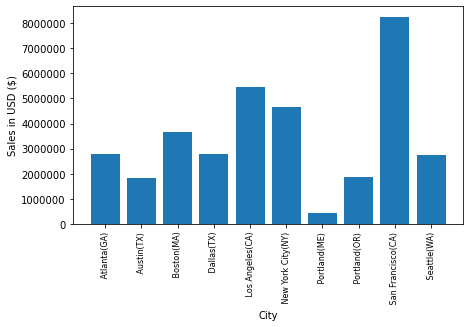

In [430]:
fig,ax=plt.subplots()
plt.bar(results.index,results['Sales'])
plt.xlabel('City')
plt.ylabel('Sales in USD ($)')
ax.ticklabel_format(axis='y',style='plain')
fig.set_figwidth(7)
plt.xticks(results.index,rotation='vertical',size=8)
plt.show()

### Conclusion: From the above chart we can say that the maximum number of order came from San Francisco

### Question 3: Which time is suitable for advertising the product to maximize the likelihood of its sales?

In [431]:
all_data_new['Hour']=all_data_new['Order Date'].dt.hour
all_data_new['Minute']=all_data_new['Order Date'].dt.minute
all_data_new.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr,23.90,Dallas(TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr,99.99,Boston(MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles(CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles(CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Apr,11.99,Los Angeles(CA),9,27


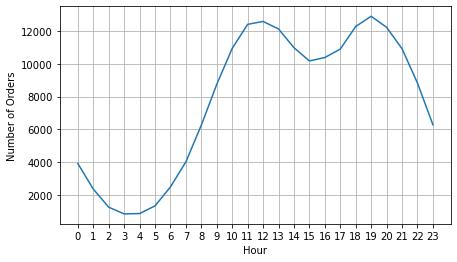

In [432]:
hours=[]
for ind in all_data_new.groupby('Hour').count().index:
    hours.append(ind)
fig,ax=plt.subplots()
plt.plot(hours,all_data_new.groupby('Hour').count()['Order ID'])
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
fig.set_figwidth(7)
plt.xticks(hours)
plt.show()

### Conclusion: We should advertise at around 12 PM. and 7 PM. to maximize the sale of any product

### Question 4: What two products are often sold together?

In [433]:
df=all_data_new[all_data_new.duplicated('Order ID',keep=False)]
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles(CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles(CA),14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",Apr,600.00,Los Angeles(CA),19,42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",Apr,11.95,Los Angeles(CA),19,42
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",Apr,99.99,Boston(MA),11,31
...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",Sep,3.84,Atlanta(GA),20,18
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",Sep,11.99,Atlanta(GA),0,25
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",Sep,5.98,Atlanta(GA),0,25
186841,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",Sep,600.00,San Francisco(CA),13,49


In [434]:
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles(CA),14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles(CA),14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",Apr,600.00,Los Angeles(CA),19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",Apr,11.95,Los Angeles(CA),19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",Apr,99.99,Boston(MA),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."
...,...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",Sep,3.84,Atlanta(GA),20,18,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",Sep,11.99,Atlanta(GA),0,25,"Wired Headphones,AAA Batteries (4-pack)"
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",Sep,5.98,Atlanta(GA),0,25,"Wired Headphones,AAA Batteries (4-pack)"
186841,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",Sep,600.00,San Francisco(CA),13,49,"Google Phone,USB-C Charging Cable"


In [435]:
df=df[['Order ID','Grouped']].drop_duplicates()
df

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [436]:
from itertools import combinations
from collections import Counter

In [437]:
count=Counter()
for row in df['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))

for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Conclusion: iPhone and Lightning Charging Cable - these are the two products that are often sold together

### Question 5: Which product is sold the most? Why do you think so?

In [438]:
all_data_new.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr,23.90,Dallas(TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr,99.99,Boston(MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles(CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles(CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Apr,11.99,Los Angeles(CA),9,27


In [439]:
Grouped_Product=all_data_new.groupby('Product').sum()
Grouped_Product

,Quantity Ordered,Price Each,Sales,Hour,Minute
Product,,,,,
20in Monitor,4129,451068.99,454148.71,58764,122252
27in 4K Gaming Monitor,6244,2429637.70,2435097.56,90916,184331
27in FHD Monitor,7550,1125974.93,1132424.50,107540,219948
34in Ultrawide Monitor,6199,2348718.19,2355558.01,89076,183480
AA Batteries (4-pack),27635,79015.68,106118.40,298342,609039
AAA Batteries (4-pack),31017,61716.59,92740.83,297332,612113
Apple Airpods Headphones,15661,2332350.00,2349150.00,223304,455570
Bose SoundSport Headphones,13457,1332366.75,1345565.43,192445,392603
Flatscreen TV,4819,1440000.00,1445700.00,68815,142789


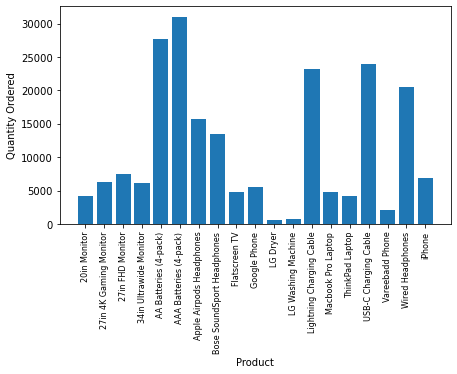

In [440]:

fig, ax = plt.subplots()
plt.bar(Grouped_Product.index,Grouped_Product['Quantity Ordered'])
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.xticks(Grouped_Product.index,rotation='vertical',size=8)
fig.set_figwidth(7)
plt.show()

In [441]:
prices=all_data_new.groupby('Product').mean()['Price Each']

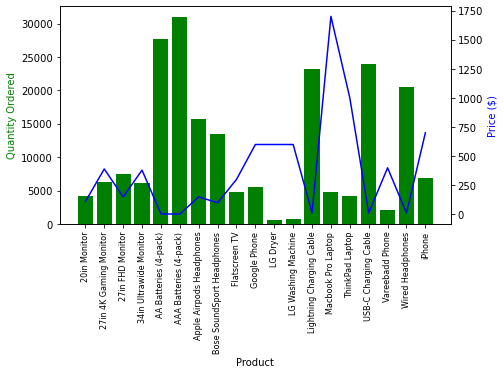

In [442]:
products=[]
for ind in Grouped_Product.index:
    products.append(ind)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products,Grouped_Product['Quantity Ordered'],color='g')
ax2.plot(products,prices, 'b-')
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products,rotation='vertical',size=8)
fig.set_figwidth(7)
plt.show()

### Conclusion: AAA Battery is the most ordered product and it is because of its low price